In [2]:
import sys, os
clones_path = os.path.abspath('..')
if clones_path not in sys.path:
    sys.path.insert(0, clones_path)
    
import numpy as np
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
from clones.annotation.validation.benchmark import Benchmark

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
sweep_path = '../../growth/simulations/Sweep_181121_235632/'
sweep = Sweep.load(sweep_path)

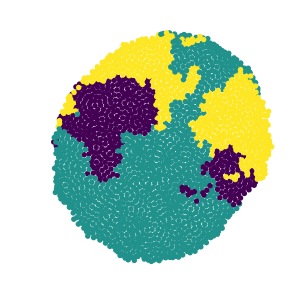

In [47]:
simulation_id = 20
simulation = sweep[simulation_id]
simulation.plot()

In [66]:
scale = 5

# measure culture
measurements = simulation.measure(scale=scale)

# perform benchmark annotation
benchmark = Benchmark(measurements)

# print results
simple_score = benchmark.scores['simple']
community_score = benchmark.scores['community']
print('Simple: F1 {:0.3f}, Error {:0.3f}, MAE {:0.3f}'.format(simple_score.f1, simple_score.error, simple_score.MAE))
print('Community: F1 {:0.3f}, Error {:0.3f}, MAE {:0.3f}'.format(community_score.f1, community_score.error, community_score.MAE))

Simple: F1 0.934, Error 0.035, MAE 0.046
Community: F1 0.974, Error 0.015, MAE 0.021


In [41]:
simple = []
community = []

for _ in range(10):
    measurements = simulation.measure(scale=scale)
    benchmark = Benchmark(measurements)
    simple_score = benchmark.scores['simple']
    simple.append(simple_score.MAE)
    community_score = benchmark.scores['community']
    community.append(community_score.MAE)
    

In [67]:
simple

[0.08956431297389124,
 0.07081010022396728,
 0.07813662970918153,
 0.0957273561633819,
 0.0807316585729738,
 0.08777323269817909,
 0.07019011668761489,
 0.09036880934665066,
 0.09858703750769511,
 0.08423660099857383]

In [37]:
community

[0.18344642647716272,
 0.11560908680279659,
 0.10176016598461202,
 0.11618129180673854,
 0.15830754912241687,
 0.20753279202171268,
 0.1265080128911437,
 0.1899521222251744,
 0.2122455815450812,
 0.24571590425771986]

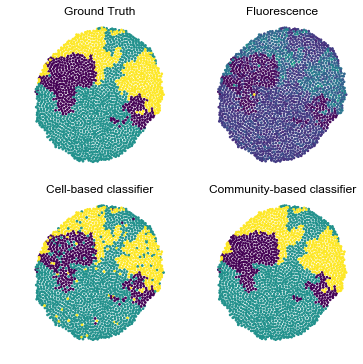

In [68]:
benchmark.show()

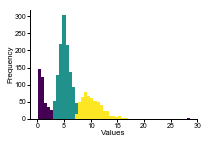

In [69]:
benchmark.cell_classifier.show()

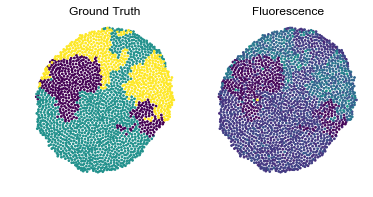

In [70]:
benchmark.show_measurements()

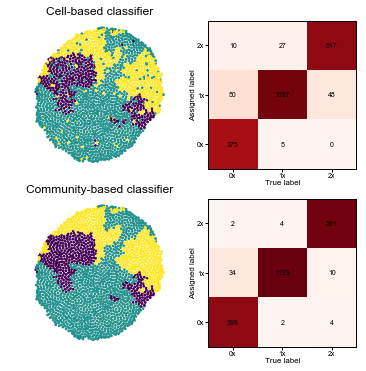

In [71]:
benchmark.show_comparison(text='counts')

In [115]:
scoring = benchmark.scores['community']

In [119]:
scoring.data.difference.sum() / (2*len(scoring.data))

0.0006986492780624127

In [130]:
scoring.data.difference.sum() / (scoring.n*2)

0.0006986492780624127

In [129]:
from sklearn.metrics import f1_score

score = f1_score(*scoring.data[['measured', 'predicted']].values.T, average='weighted')
score


0.9986033354930225

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])